 # Name: Yassa Fareed
# The Sparks Foundation (Data Science & Business Analytics)
# Task2 - Color Identification in Images
# Task from other internship function


Importing libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

Reading the image 

The type of this input is <class 'numpy.ndarray'>
Shape: (173, 207, 3)


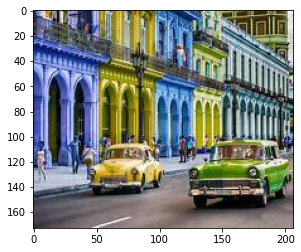

In [2]:
image = cv2.imread('cuba.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

Some useful methods

In [4]:
def RGB2HEX(color): #converts the image from rgb to hex
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path): # converts the image to rgb
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image    

def showchart(counts,hex_colors): # shows the pie chart
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

def resized_image(x,y): #resizes images given to shape x,y
   return cv2.resize(image, (x, y), interpolation = cv2.INTER_AREA) #resize the image to 600*400


def getcolors(image, number_of_colors):  #get colors and returns rgb_colors after applying kmeans
    
  resizedimage =resized_image(600,400)
  reshapedimage = resizedimage.reshape(600*400, 3) #reshaped the image to 600*400*3
    
  clf = KMeans(n_clusters = number_of_colors) # makes clusters based on number of colors
  labels = clf.fit_predict(reshapedimage) #fit the kmeans on reshaped image
    
  counts = Counter(labels)
  #print(counts)
  center_colors = clf.cluster_centers_ #gets the centrioids 
  #print(center_colors)
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()] # converts each ordered color from rgb to hex
  rgb_colors = [ordered_colors[i] for i in counts.keys()] 
  showchart(counts,hex_colors)

  return rgb_colors


[array([39.6942217 , 44.89606015, 31.37814286]),
 array([128.94283809, 136.02464566, 150.18917792]),
 array([ 72.71834468,  85.12089347, 107.03358345]),
 array([146.54540743, 142.59604304,  48.65631192]),
 array([188.25523749, 197.69945855, 199.68168422])]

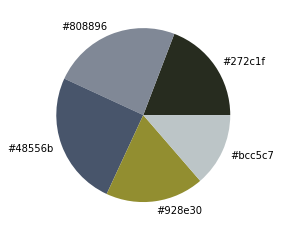

In [21]:
getcolors(get_image(r'cuba.jpg'), 5)

**Elbow Method**
Method to help finding the appropriate number of clusters in a dataset

In [10]:
def elbow_method(image):
  
  resizedimage = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA) #resize the image to 600*400
  reshapedimage = resizedimage.reshape(600*400, 3) #reshaped the image to 600*400*3

  # fitting multiple k-means algorithms and storing the intertia values in an empty list
  SSE = []
  for cluster in range(1,10):
      kmeans = KMeans( n_clusters = cluster, init='k-means++')
      kmeans.fit(reshapedimage)
      SSE.append(kmeans.inertia_)

  # converting the results into a dataframe and plotting them
  frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
  #plt.figure(figsize=(12,6))
  plt.plot(frame['Cluster'], frame['SSE'], marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()

Applying elbow method 

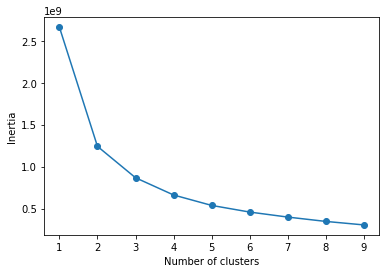

In [12]:
elbow_method(get_image(r'cuba.jpg'))


This shows the that the 4 is the optimal number of clusters that can be made for this image

[array([ 51.37598991, 143.34316889, 147.15425001]),
 array([49.88076929, 53.59740373, 46.07570758]),
 array([134.39780293, 114.2455738 , 105.45822853]),
 array([193.74929919, 189.32149553, 179.32137054])]

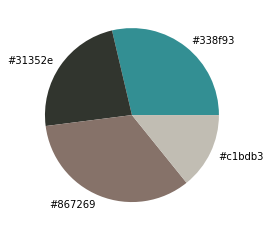

In [17]:
getcolors(get_image(r'cuba.jpg'), 4) 